In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [202]:
data_file = "conso.txt"

In [203]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [204]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [205]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


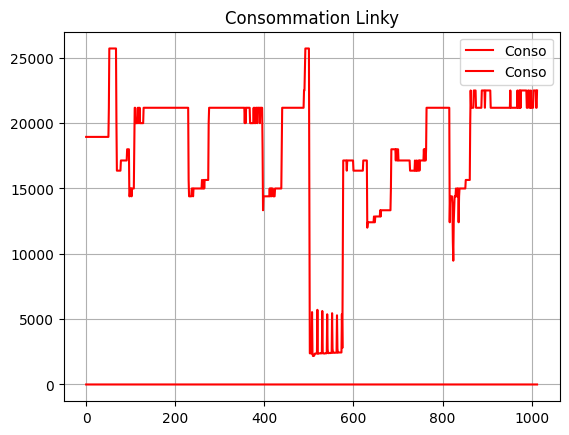

In [206]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [207]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [208]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28666 entries, 0 to 28665
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  28666 non-null  int64  
 1   kWh       28666 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 448.0 KB


In [209]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
28661,21744,0.17
28662,21604,0.17
28663,21209,0.17
28664,20873,0.17


In [210]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
28661,21744,0.17,21.744,165.562914,681942698
28662,21604,0.17,21.604,166.635808,681964302
28663,21209,0.17,21.209,169.739262,681985511
28664,20873,0.17,20.873,172.471614,682006384


In [211]:
# index dernier echantillon
l=len(conso_data)-1
l

28665

In [212]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

682026995000

In [213]:
old

False

In [214]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 23, 28, 690291)

In [215]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28666 entries, 0 to 28665
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   28666 non-null  int64         
 1   kWh        28666 non-null  float64       
 2   sec        28666 non-null  float64       
 3   Wh         28666 non-null  float64       
 4   cumul(ms)  28666 non-null  int64         
 5   dates      28666 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.3 MB


In [216]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:23:54.979291,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:21.222291,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:24:47.107291,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:12.861291,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:38.635291,07/03/2024
...,...,...,...,...,...,...,...
28661,21744,0.17,21.744,165.562914,681942698,2024-03-14 21:49:11.388291,14/03/2024
28662,21604,0.17,21.604,166.635808,681964302,2024-03-14 21:49:32.992291,14/03/2024
28663,21209,0.17,21.209,169.739262,681985511,2024-03-14 21:49:54.201291,14/03/2024
28664,20873,0.17,20.873,172.471614,682006384,2024-03-14 21:50:15.074291,14/03/2024


In [217]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:23:54.979291   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh  cumul(ms)  \
 28665     20611  0.17  20.611  174.664014  682026995   
 
                            dates        days  
 28665 2024-03-14 21:50:35.685291  14/03/2024  )

In [218]:
# tranche journalière
now = datetime.now()
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'14/03/2024'

In [219]:
#manuel
#day = '11/03/2024'

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

3350

In [220]:
conso_day.head(1).dates, conso_day.tail(1).dates

(25316   2024-03-14 00:00:02.342291
 Name: dates, dtype: datetime64[ns],
 28665   2024-03-14 21:50:35.685291
 Name: dates, dtype: datetime64[ns])

In [221]:
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\1613890403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
25316,26754,0.13,26.754,134.559318,603393652,2024-03-14 00:00:02.342291,14/03/2024,0:0:2
25317,26149,0.14,26.149,137.672569,603419801,2024-03-14 00:00:28.491291,14/03/2024,0:0:28
25318,25684,0.14,25.684,140.165083,603445485,2024-03-14 00:00:54.175291,14/03/2024,0:0:54
25319,25886,0.14,25.886,139.071313,603471371,2024-03-14 00:01:20.061291,14/03/2024,0:1:20
25320,26718,0.13,26.718,134.740624,603498089,2024-03-14 00:01:46.779291,14/03/2024,0:1:46
...,...,...,...,...,...,...,...,...
28661,21744,0.17,21.744,165.562914,681942698,2024-03-14 21:49:11.388291,14/03/2024,21:49:11
28662,21604,0.17,21.604,166.635808,681964302,2024-03-14 21:49:32.992291,14/03/2024,21:49:32
28663,21209,0.17,21.209,169.739262,681985511,2024-03-14 21:49:54.201291,14/03/2024,21:49:54
28664,20873,0.17,20.873,172.471614,682006384,2024-03-14 21:50:15.074291,14/03/2024,21:50:15


In [222]:
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:2,26754,0.13,26.754,134.559318,603393652,2024-03-14 00:00:02.342291,14/03/2024
0:0:28,26149,0.14,26.149,137.672569,603419801,2024-03-14 00:00:28.491291,14/03/2024
0:0:54,25684,0.14,25.684,140.165083,603445485,2024-03-14 00:00:54.175291,14/03/2024
0:1:20,25886,0.14,25.886,139.071313,603471371,2024-03-14 00:01:20.061291,14/03/2024
0:1:46,26718,0.13,26.718,134.740624,603498089,2024-03-14 00:01:46.779291,14/03/2024
...,...,...,...,...,...,...,...
21:49:11,21744,0.17,21.744,165.562914,681942698,2024-03-14 21:49:11.388291,14/03/2024
21:49:32,21604,0.17,21.604,166.635808,681964302,2024-03-14 21:49:32.992291,14/03/2024
21:49:54,21209,0.17,21.209,169.739262,681985511,2024-03-14 21:49:54.201291,14/03/2024


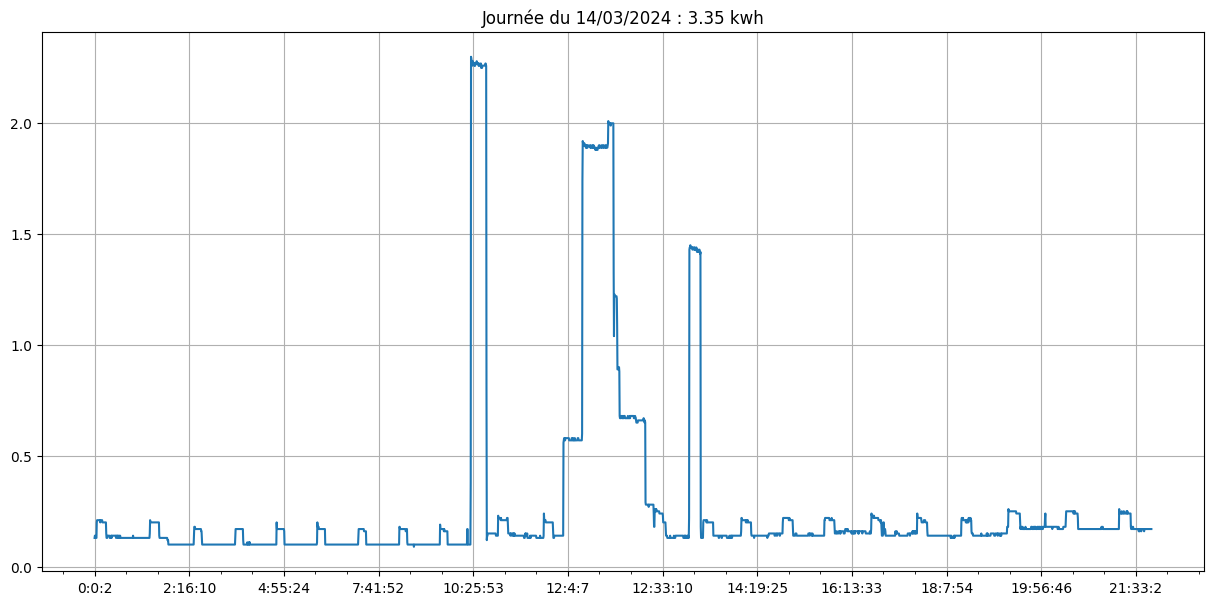

In [226]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [161]:


time = conso_data['dates']
time


0       2024-03-07 00:23:47.913260
1       2024-03-07 00:24:14.156260
2       2024-03-07 00:24:40.041260
3       2024-03-07 00:25:05.795260
4       2024-03-07 00:25:31.569260
                   ...            
28616   2024-03-14 21:32:55.615260
28617   2024-03-14 21:33:16.561260
28618   2024-03-14 21:33:37.389260
28619   2024-03-14 21:33:58.315260
28620   2024-03-14 21:34:18.954260
Name: dates, Length: 28621, dtype: datetime64[ns]

In [162]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [163]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [164]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

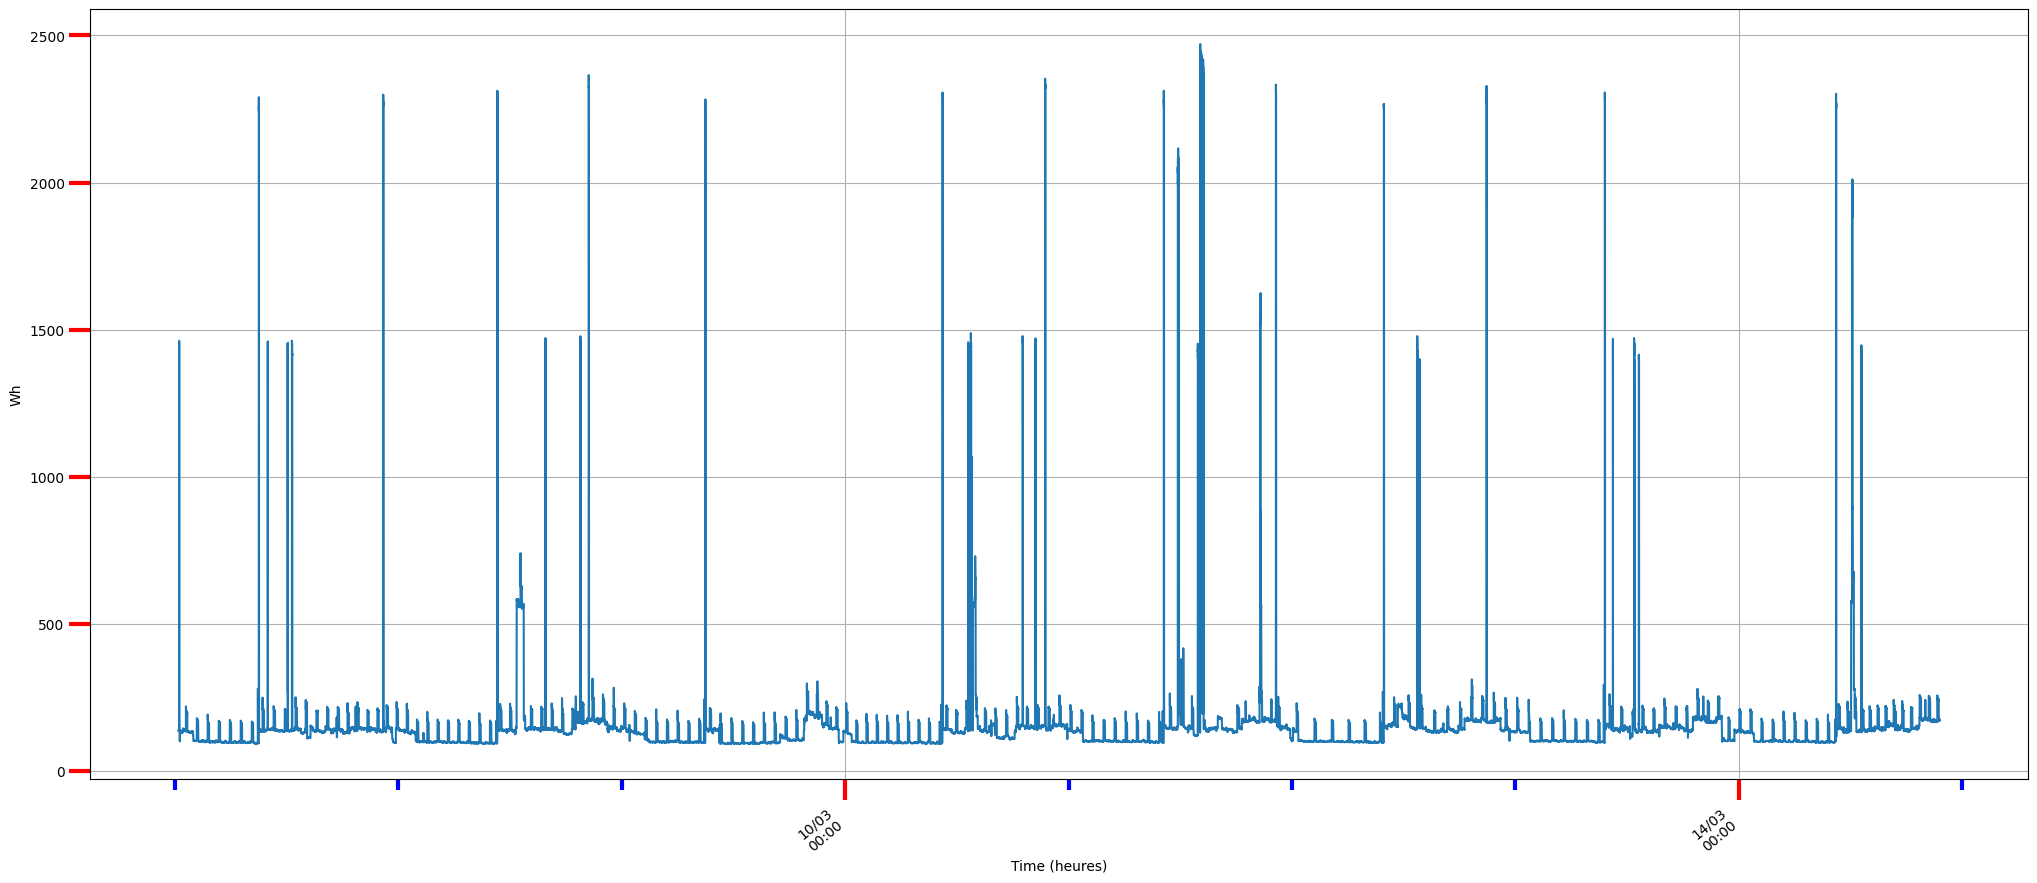

In [165]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [166]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
28620,20639,0.17,20.639,174.427056,681057330,2024-03-14 21:34:18.954260,14/03/2024


In [167]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

681057330000

# Slice of last 1 kWh

In [168]:
l = len(conso_data)  # total watt consommés
l

28621

In [169]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(28621, 1000)

In [170]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [171]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh  cumul(ms)  \
 27621     25700  0.14  25.700  140.077821  659815948   
 27622     25605  0.14  25.605  140.597540  659841553   
 27623     25789  0.14  25.789  139.594401  659867342   
 27624     25578  0.14  25.578  140.745954  659892920   
 27625     25828  0.14  25.828  139.383615  659918748   
 ...         ...   ...     ...         ...        ...   
 28616     20939  0.17  20.939  171.927981  680973991   
 28617     20946  0.17  20.946  171.870524  680994937   
 28618     20828  0.17  20.828  172.844248  681015765   
 28619     20926  0.17  20.926  172.034789  681036691   
 28620     20639  0.17  20.639  174.427056  681057330   
 
                            dates        days  
 27621 2024-03-14 15:40:17.572260  14/03/2024  
 27622 2024-03-14 15:40:43.177260  14/03/2024  
 27623 2024-03-14 15:41:08.966260  14/03/2024  
 27624 2024-03-14 15:41:34.544260  14/03/2024  
 27625 2024-03-14 15:42:00.372260  14/03/2024  
 ...               

In [172]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [173]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [174]:
cumtime_end,cumtime_start

(681057330000, 659841553000)

In [175]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

21215777000

In [176]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 14, 21, 34, 26, 292270),
 datetime.datetime(2024, 3, 14, 15, 40, 50, 515270),
 '14/03/2024 21:34:18')

In [177]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:23:47.913260,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:14.156260,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:24:40.041260,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:05.795260,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:31.569260,07/03/2024
...,...,...,...,...,...,...,...
28616,20939,0.17,20.939,171.927981,680973991,2024-03-14 21:32:55.615260,14/03/2024
28617,20946,0.17,20.946,171.870524,680994937,2024-03-14 21:33:16.561260,14/03/2024
28618,20828,0.17,20.828,172.844248,681015765,2024-03-14 21:33:37.389260,14/03/2024
28619,20926,0.17,20.926,172.034789,681036691,2024-03-14 21:33:58.315260,14/03/2024


In [178]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('14/03/2024 15:40:43', '14/03/2024 21:34:18')

In [179]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-14 15:40:17.572260', '2024-03-14 21:34:18.954260')

In [180]:
k

1

In [181]:
data.Interval.tail(1000)

27621    25700
27622    25605
27623    25789
27624    25578
27625    25828
         ...  
28616    20939
28617    20946
28618    20828
28619    20926
28620    20639
Name: Interval, Length: 1000, dtype: int64

In [182]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.907522777777778, 4.0626165827545115, 5, 54, 27)

In [183]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [184]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
27621,25700,0.14,25.700,140.077821,659815948,2024-03-14 15:40:17.572260,14/03/2024,2024-03-14 15:40:17.572260
27622,25605,0.14,25.605,140.597540,659841553,2024-03-14 15:40:43.177260,14/03/2024,2024-03-14 15:40:43.177260
27623,25789,0.14,25.789,139.594401,659867342,2024-03-14 15:41:08.966260,14/03/2024,2024-03-14 15:41:08.966260
27624,25578,0.14,25.578,140.745954,659892920,2024-03-14 15:41:34.544260,14/03/2024,2024-03-14 15:41:34.544260
27625,25828,0.14,25.828,139.383615,659918748,2024-03-14 15:42:00.372260,14/03/2024,2024-03-14 15:42:00.372260
...,...,...,...,...,...,...,...,...
28616,20939,0.17,20.939,171.927981,680973991,2024-03-14 21:32:55.615260,14/03/2024,2024-03-14 21:32:55.615260
28617,20946,0.17,20.946,171.870524,680994937,2024-03-14 21:33:16.561260,14/03/2024,2024-03-14 21:33:16.561260
28618,20828,0.17,20.828,172.844248,681015765,2024-03-14 21:33:37.389260,14/03/2024,2024-03-14 21:33:37.389260
28619,20926,0.17,20.926,172.034789,681036691,2024-03-14 21:33:58.315260,14/03/2024,2024-03-14 21:33:58.315260


<Axes: >

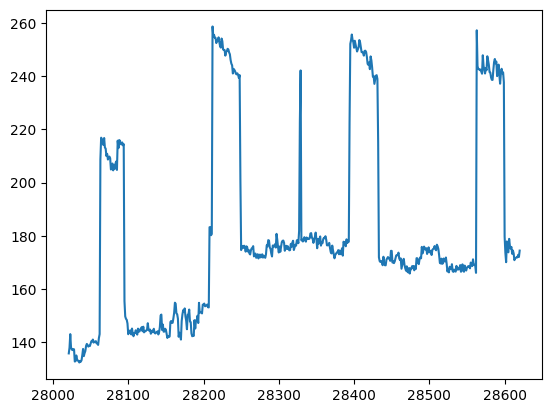

In [185]:
data.tail(600)['Wh'].plot()

In [186]:
data['Wh']

27621    140.077821
27622    140.597540
27623    139.594401
27624    140.745954
27625    139.383615
            ...    
28616    171.927981
28617    171.870524
28618    172.844248
28619    172.034789
28620    174.427056
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

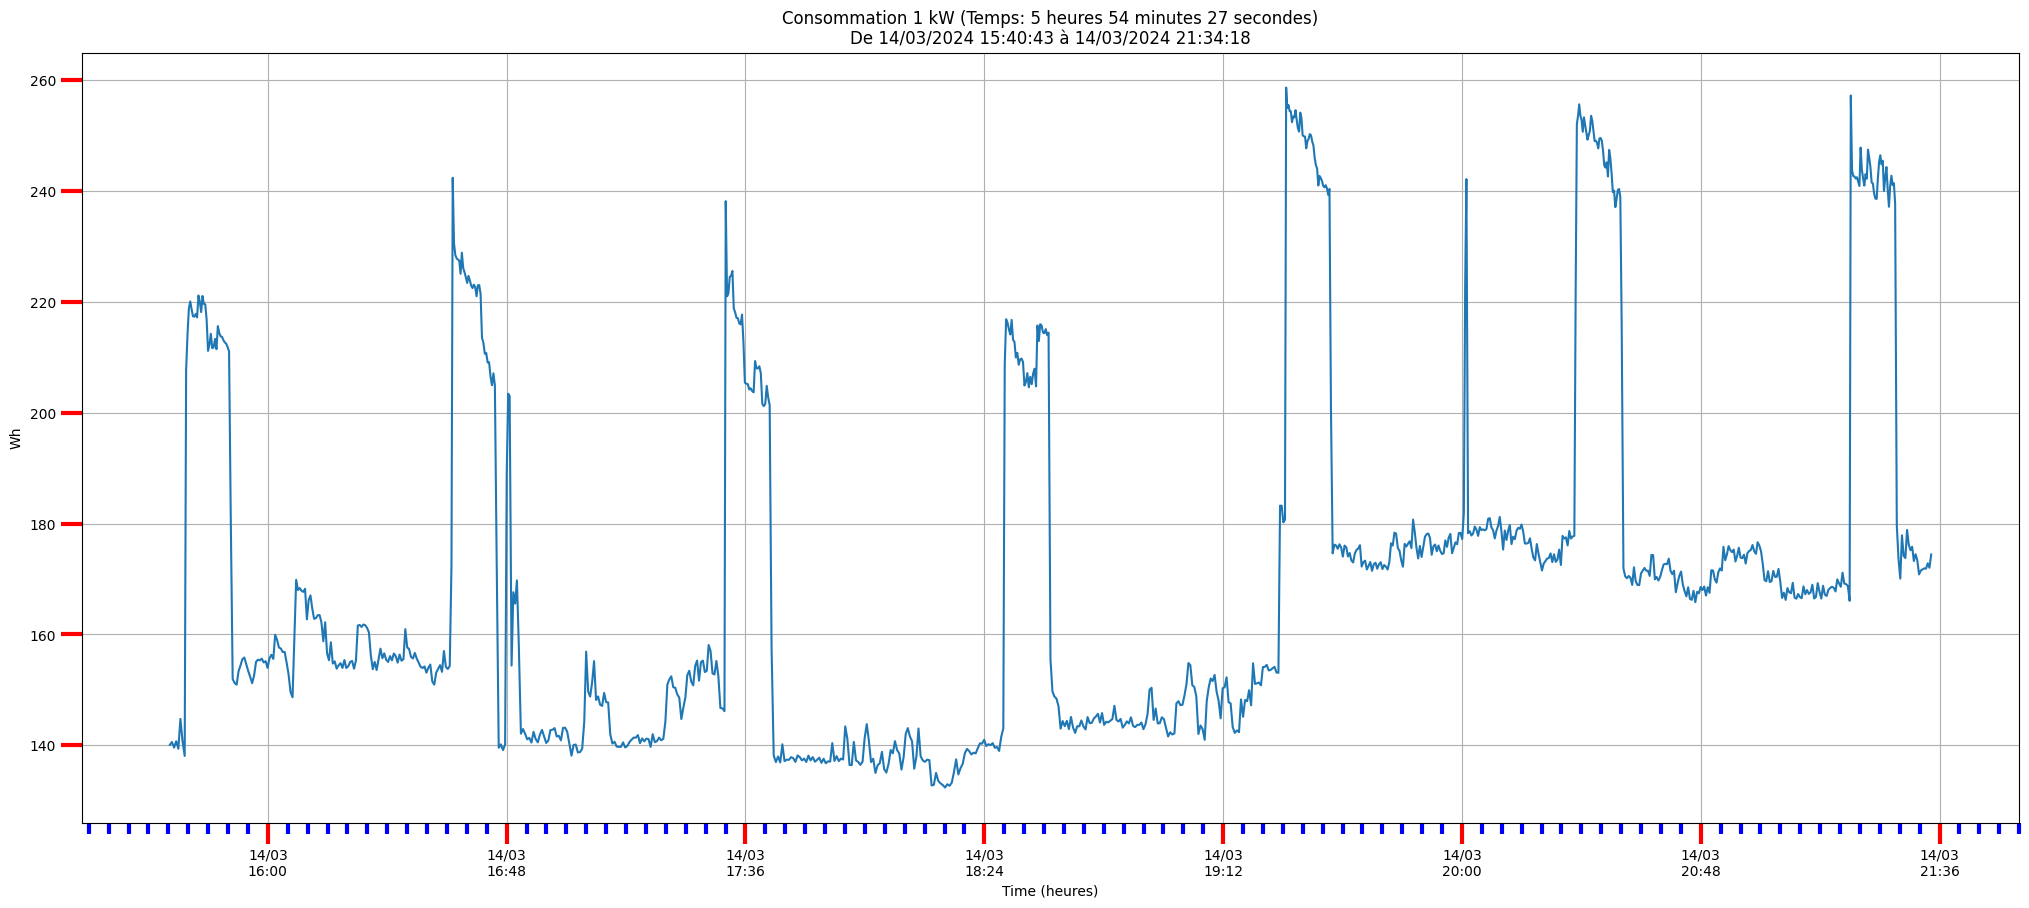

In [187]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

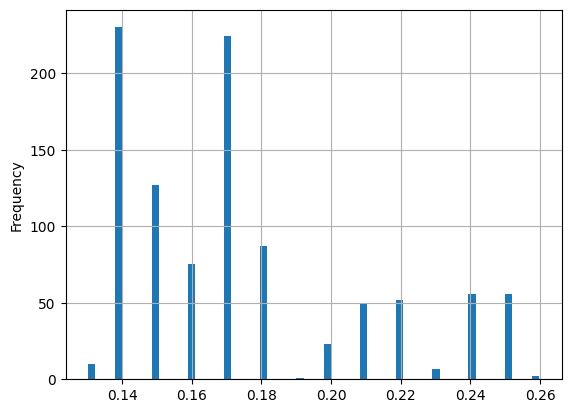

In [188]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [189]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
28616,20939,0.17,20.939,171.927981,680973991,2024-03-14 21:32:55.615260,14/03/2024
28617,20946,0.17,20.946,171.870524,680994937,2024-03-14 21:33:16.561260,14/03/2024
28618,20828,0.17,20.828,172.844248,681015765,2024-03-14 21:33:37.389260,14/03/2024
28619,20926,0.17,20.926,172.034789,681036691,2024-03-14 21:33:58.315260,14/03/2024
28620,20639,0.17,20.639,174.427056,681057330,2024-03-14 21:34:18.954260,14/03/2024


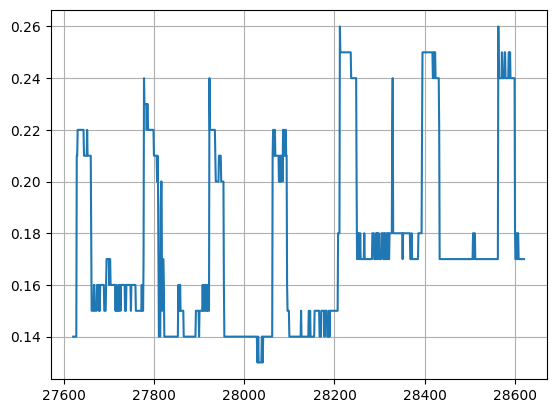

In [190]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [191]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(681057330000.0, 11350.9555)

In [192]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 14, 21, 34, 33, 237445),
 datetime.datetime(2024, 3, 7, 0, 23, 35, 907445))

In [193]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(28621, 681058, 189.18277777777777)

In [194]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [195]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [196]:
732/12 # 60 jours

61.0

In [197]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

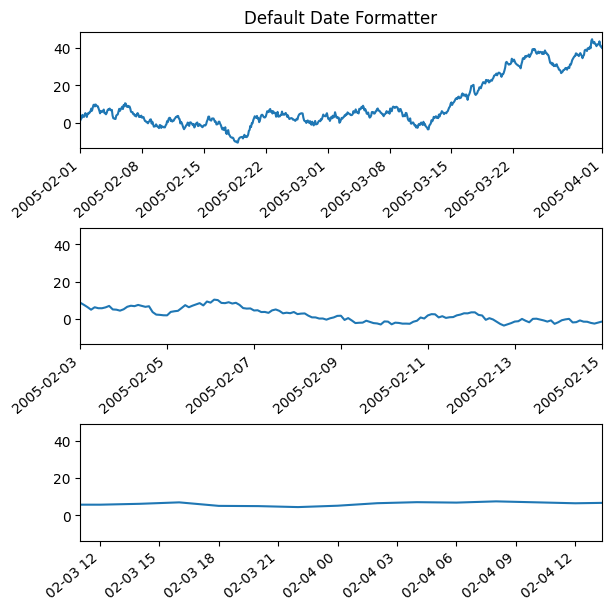

In [198]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [199]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)